In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./Bank_Customer.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id         10000 non-null int64
credit_score        10000 non-null int64
country             10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              10000 non-null int64
balance             10000 non-null float64
products_number     10000 non-null int64
credit_card         10000 non-null int64
active_member       10000 non-null int64
estimated_salary    10000 non-null float64
churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [3]:
columns = data.columns
array = []
for count in columns:
    array.append(count)
array.remove(array[11])
print(array)

['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']


In [4]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd32add96d0>]],
      dtype=object)

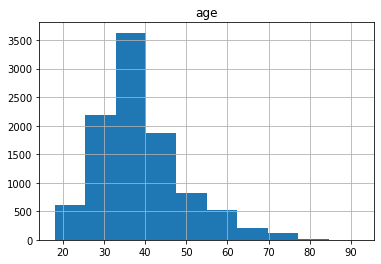

In [5]:
user =  data.copy()
user.hist(column="age")

<BarContainer object of 2 artists>

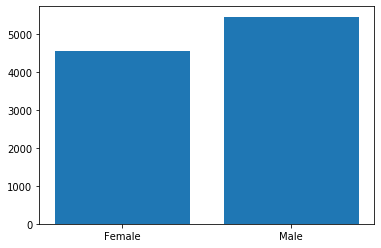

In [6]:
gender = user.groupby('gender').size()
x=['Female','Male']
y = [gender[0],gender[1]]
plt.bar(x,y)

In [7]:
user['gender'].replace(['Female','Male'],[0,1],inplace= True)
print(user['gender'])

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: gender, Length: 10000, dtype: int64


In [8]:
user['country'].replace(['France','Spain','Germany'],[0,1,2],inplace= True)
print(user['country'])

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    2
9999    0
Name: country, Length: 10000, dtype: int64


In [9]:
# data.loc(user[''])
#X 代表輸入資料, y 代表輸出結果
y = user['churn']                   # 變出 y 資料
X = user.drop(['churn','customer_id'], axis=1) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [19]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# LDA=LinearDiscriminantAnalysis(n_components=2)
# lda_x=LDA.fit_transform(X_train,y_train)
# print (lda_x)

[[ 2.07216813]
 [-1.00567398]
 [-2.52767846]
 ...
 [-0.82846931]
 [ 1.29286398]
 [ 0.13862198]]


/home/hui/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(10, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/home/hui/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [16]:
from sklearn.svm import SVC
model = SVC(gamma=0.7, C=1)

#使用Support Vector Classifier來建立模型
model.fit(X_train,y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
predictions = model.predict(X_test)

#載入classification_report & confusion_matrix來評估模型好壞
from sklearn.metrics import classification_report,confusion_matrix
# print(confusion_matrix(y_test,predictions))
# print('\n')
print(model.score(X_test,y_test))
print(classification_report(y_test,predictions))

0.792
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1584
           1       0.00      0.00      0.00       416

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



/home/hui/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model_entropy, out_file='mushrooms.dot',
                feature_names=['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary'],
                class_names=str(model_entropy.classes_))

In [ ]:
plt.plot(score_gini,'-bo')
# plt.text(score_gini,num2str(str))
plt.title('score_gini')

In [ ]:
plt.plot(score_entropy,'-bo')
plt.title('score_entropy')